# 종합실습2_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [51]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [52]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

In [53]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [54]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

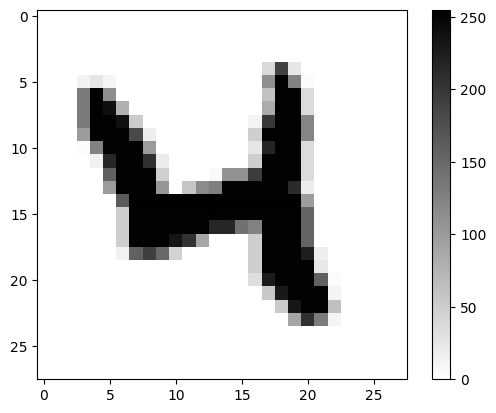

In [55]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 20

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [56]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 113,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 240,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 252, 238,  52,   0,   0,   0,   0,   0,   0,   0,   0,  12, 198, 252, 252, 122,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  99, 252, 252, 252, 181,  17,   0,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 122,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   3, 125, 252, 252, 252, 100,   0,   0,   0,   0,   0,   0,   0,  26, 218, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  15, 216, 252, 252, 207,  19,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 157, 252, 252, 252,  48,   0,   0,   0,   6, 109, 109, 194, 252, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100, 252, 252, 252, 105,   0,  58, 116, 128, 252, 252, 252, 252, 252, 212,  19,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 164, 253, 253, 253, 253, 253, 253, 255, 253, 253, 253, 253, 253, 253,  99,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252, 217, 216, 141, 126, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 234, 204,  89,   0,   0,   0,  49, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  14, 158, 192, 151,  45,   0,   0,   0,   0,   0,  49, 252, 252, 252, 225,  17,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252,  23,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  33, 228, 252, 252, 252, 157,   4,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55, 229, 252, 252, 252,  11,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53, 232, 252, 252,  63,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 206, 131,  11,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [57]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 113,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 240,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 252, 238,  52,   0,   0,   0,   0,   0,   0,   0,   0,  12, 198, 252, 252, 122,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  99, 252, 252, 252, 181,  17,   0,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 122,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   3, 125, 252, 252, 252, 100,   0,   0,   0,   0,   0,   0,   0,  26, 218, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  15, 216, 252, 252, 207,  19,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 157, 252, 252, 252,  48,   0,   0,   0,   6, 109, 109, 194, 252, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100, 252, 252, 252, 105,   0,  58, 116, 128, 252, 252, 252, 252, 252, 212,  19,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 164, 253, 253, 253, 253, 253, 253, 255, 253, 253, 253, 253, 253, 253,  99,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252, 217, 216, 141, 126, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 234, 204,  89,   0,   0,   0,  49, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  14, 158, 192, 151,  45,   0,   0,   0,   0,   0,  49, 252, 252, 252, 225,  17,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252,  23,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  33, 228, 252, 252, 252, 157,   4,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55, 229, 252, 252, 252,  11,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53, 232, 252, 252,  63,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 206, 131,  11,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

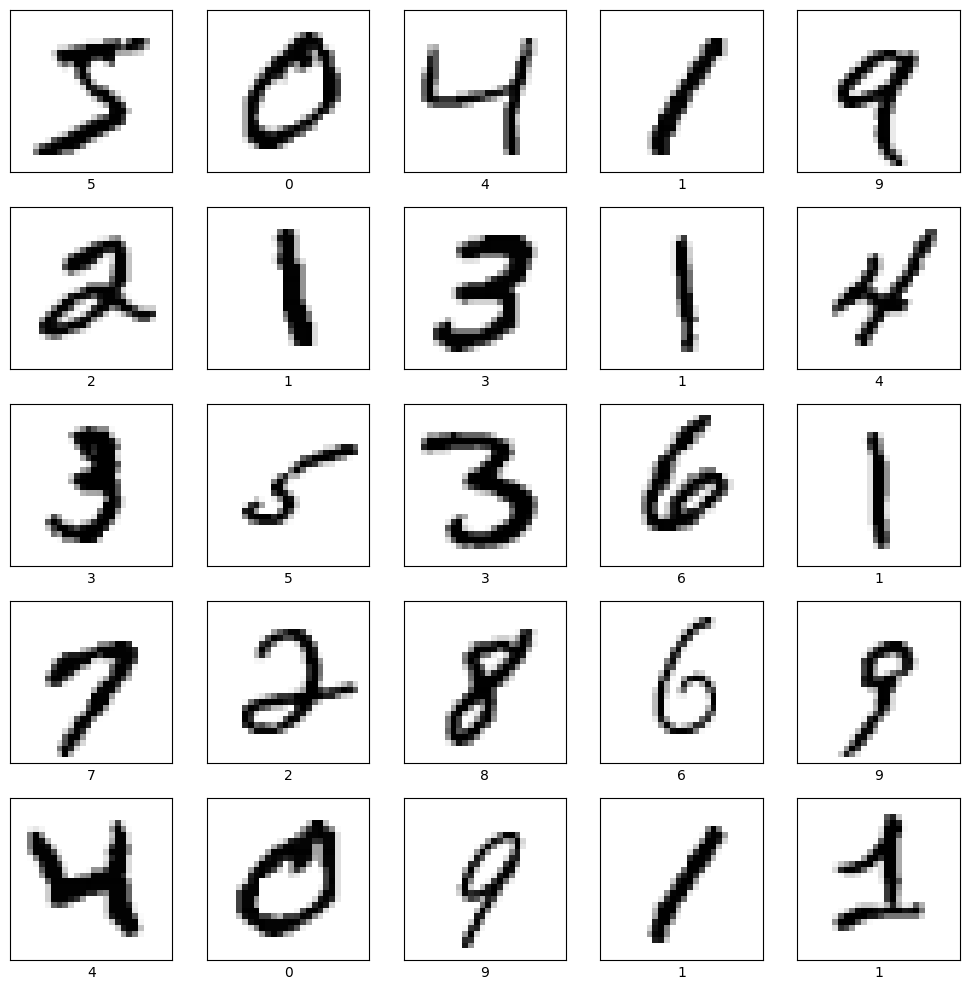

In [58]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [59]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [60]:
a = np.array([[1,2,3],[4,5,6]])
a, a.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

In [61]:
#
print(a.reshape(3,2))
print(a.reshape(6,1))
print(a.reshape(6, -1))


[[1 2]
 [3 4]
 [5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [62]:
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000, -1)

In [63]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_test를 그냥 255로 나누면 됨

In [64]:
x_train = x_train / 255.
x_val = x_val / 255.

## 4.모델링

In [47]:
nfeatures = x_train.shape[1]
nfeatures

784

In [65]:
clear_session()

model = Sequential([Dense(10, input_shape = (nfeatures,), activation = 'softmax')])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' )

history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7951 - val_loss: 0.3173
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3268 - val_loss: 0.2856
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2881 - val_loss: 0.2772
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2819 - val_loss: 0.2700
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2785 - val_loss: 0.2664
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2683 - val_loss: 0.2642
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2615 - val_loss: 0.2656
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2611 - val_loss: 0.2617
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2606 - val_loss: 0.2646
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2524 - val_loss: 0.2599


* 학습결과 그래프

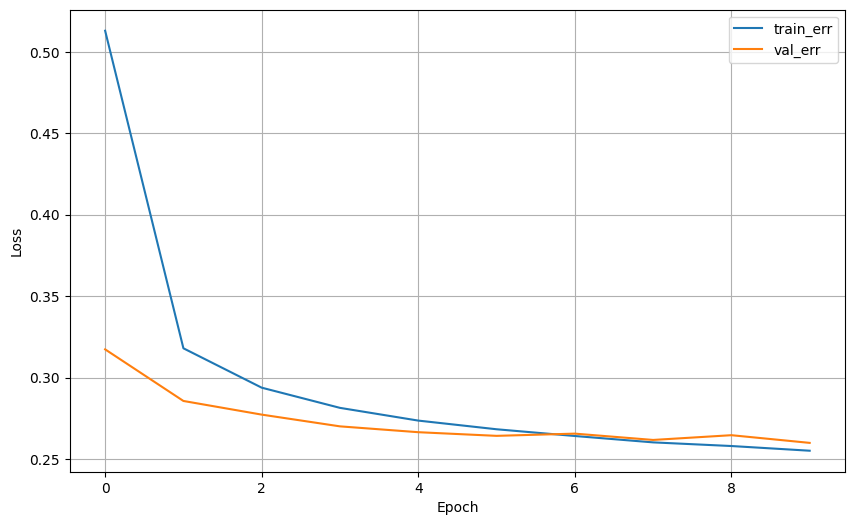

In [67]:
dl_history_plot(history)

* 예측 및 평가

In [68]:
pred = model.predict(x_val)
pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.01593923e-06, 5.41149113e-12, 3.03514366e-06, 6.51842775e-03, 2.86436403e-07, 2.24567884e-05, 2.61522965e-12, 9.93089736e-01, 1.47127530e-05, 3.50392627e-04],
       [1.07507600e-04, 1.02507265e-05, 9.96764660e-01, 3.97256881e-05, 1.20058670e-14, 7.81798561e-04, 2.26671947e-03, 4.17048459e-18, 2.94695874e-05, 1.07709430e-14],
       [2.00599652e-06, 9.81320560e-01, 1.03687048e-02, 2.65271449e-03, 1.27289852e-04, 6.92158937e-04, 7.92176696e-04, 5.26592135e-04, 3.28943110e-03, 2.28300967e-04],
       [9.99837995e-01, 1.49504905e-11, 3.47556997e-05, 2.90310686e-06, 2.70738933e-08, 7.25867503e-05, 3.43123138e-05, 5.66661765e-06, 6.72720853e-06, 5.02551802e-06],
       [3.38573620e-04, 2.53485098e-07, 1.56103482e-03, 2.29123561e-05, 9.72917974e-01, 7.47146696e-05, 9.95613402e-04, 2.23877747e-03, 4.31255018e-03, 1.75376590e-02]], dtype=float32)

In [69]:
pred_1 = pred.argmax(axis=1)# 행에서 가장 큰 값을 찾아라
pred_1[:5]

array([7, 2, 1, 0, 4])

In [70]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 961    0    1    2    0    8    5    2    1    0]
 [   0 1117    3    3    0    1    3    2    6    0]
 [   4   10  923   17    6    5   11   10   42    4]
 [   3    0   19  926    0   23    2   11   20    6]
 [   2    2    6    2  914    0    8    4   10   34]
 [   7    3    4   36    8  782   10    6   31    5]
 [  14    3   10    1    8   20  899    1    2    0]
 [   1    6   19    9    7    1    0  953    3   29]
 [   5    9    7   22    8   28    6   12  872    5]
 [  11    7    1   10   25    9    0   25    8  913]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.88      0.88       892
           6       0.95      0.94      0.95       958
           7       0.93      0.93   

## 5.실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교해 봅시다.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수 (10~20 사이에서 정하세요)
    * learning_rate

### (1) 모델1

In [71]:
n=x_train.shape[1]
n

784

In [74]:
clear_session()

model=Sequential([Input(shape=(n,)),
                  Dense(500,activation='relu'),
                  Dense(300,activation='relu'),
                  Dense(100,activation='softmax')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 300)                 │         150,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 784)                 │         235,984 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 778,784 (2.97 MB)

 Trainable params: 778,784 (2.97 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy')

result=model.fit(x_train,y_train,epochs=10,validation_split=0.2).history

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.4980 - val_loss: 0.1809
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.1836 - val_loss: 0.2449
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1611 - val_loss: 0.1683
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1510 - val_loss: 0.1808
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1274 - val_loss: 0.1885
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1283 - val_loss: 0.1922
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1289 - val_loss: 0.1810
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1032 - val_loss: 0.1825
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1090 - val_loss: 0.2279
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1096 - val_loss: 0.2320


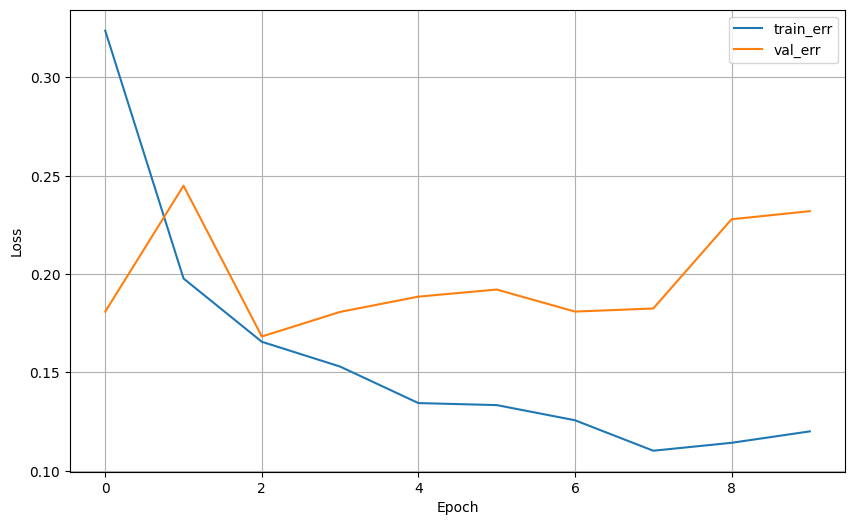

In [76]:
dl_history_plot(result)

In [79]:
pred2 = model.predict(x_val)
pred2[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.00000000e+00, 4.85923465e-07, 3.86858608e-16, 1.08401413e-11, 7.53336699e-11, 1.08466973e-30, 0.00000000e+00, 9.99999523e-01, 9.04780146e-30, 7.34308725e-10, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 

In [88]:
pred2 = pred2.argmax(axis=1)# 행에서 가장 큰 값을 찾아라
pred2[:5]

array([7, 2, 1, 0, 4])

In [81]:
print(confusion_matrix(y_val, pred2))
print(classification_report(y_val, pred2))

[[ 952    0   11    0    1    1    2    0    8    5]
 [   0 1082    1    4    0    0    0    1   47    0]
 [   1    0 1013    1    1    0    0    3   13    0]
 [   0    0   14  981    0    1    0    4    8    2]
 [   2    2    6    0  920    0    5    6   15   26]
 [   3    0    1   25    1  816    3    4   29   10]
 [  15    2    6    0    4    7  913    1    9    1]
 [   0    3   24    1    0    1    0  985    7    7]
 [   8    0    9    6    4    3    0    2  942    0]
 [   1    1    1   13    6    1    0    5   28  953]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.99      0.95      0.97      1135
           2       0.93      0.98      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.94      0.96       982
           5       0.98      0.91      0.95       892
           6       0.99      0.95      0.97       958
           7       0.97      0.96   

### (2) 모델2

In [82]:
n=x_train.shape[1]
n

784

In [83]:
clear_session()

model=Sequential([Input(shape=(n,)),
                  Dense(1000,activation='relu'),
                  Dense(700,activation='relu'),
                  Dense(300,activation='relu'),
                  Dense(100,input_shape = (nfeatures,), activation='softmax')])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1000)                │         785,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 700)                 │         700,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 300)                 │         210,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          30,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,726,100 (6.58 MB)

 Trainable params: 1,726,100 (6.58 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy')

result=model.fit(x_train,y_train,epochs=15,validation_split=0.2).history

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3924 - val_loss: 0.1317
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.1015 - val_loss: 0.1026
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0667 - val_loss: 0.1147
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0553 - val_loss: 0.1160
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0453 - val_loss: 0.1082
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0316 - val_loss: 0.1385
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0304 - val_loss: 0.1130
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0316 - val_loss: 0.1179
Epoch 9/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0209 - val_loss: 0.1592
Epoch 10/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0291 - val_loss: 0.1286
Epoch 11/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0199 - val_loss: 0.1220
Epoch 12/15
1500/1500 ━━━━━━━━

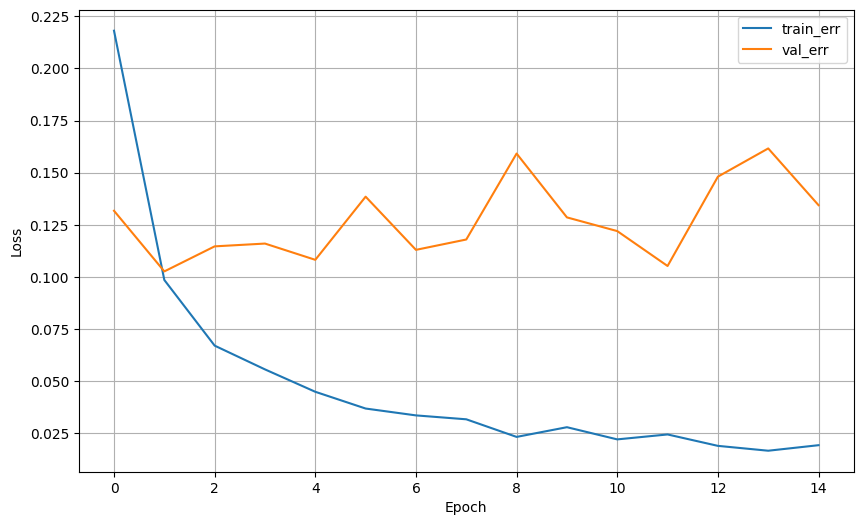

In [86]:
dl_history_plot(result)

In [87]:
pred_3=model.predict(x_val)
pred_3[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[3.56188471e-31, 2.84919914e-17, 9.15744359e-19, 3.49956718e-16, 4.19628361e-17, 5.28979819e-28, 5.78736266e-43, 1.00000000e+00, 1.35073371e-22, 9.33622957e-14, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 

In [89]:
pred_3 = pred_3.argmax(axis=1)# 행에서 가장 큰 값을 찾아라
pred_3[:5]

array([7, 2, 1, 0, 4])

In [92]:
print(confusion_matrix(y_val, pred_3))
print(classification_report(y_val, pred_3))

[[ 971    0    2    1    0    3    1    0    0    2]
 [   0 1126    2    2    0    1    2    1    1    0]
 [   3    1 1017    4    1    0    0    3    3    0]
 [   0    1    1  996    0    4    0    4    3    1]
 [   2    2    5    0  938    0    4    3    0   28]
 [   3    0    1    9    1  869    4    2    0    3]
 [   5    2    1    1    3    5  938    0    3    0]
 [   1    4   11    4    1    0    0  993    1   13]
 [   2    0    5    8    2    6    1    5  942    3]
 [   1    2    0    1    3    7    0    2    1  992]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97   

In [ ]:
# 선생님이 하신 모델구조
model2 = Sequential([Input(shape = (nfeatures, )),
Dense(512, activation = 'relu'),
Dense(256, activation = 'relu'),
Dense(128, activation = 'relu'),
Dense(32, activation = 'relu'),
Dense(10, activation = 'softmax')])
model2.summary()